In [1]:
from Hand_digits import *

Cost at epoch 0: 2.3022
Cost at epoch 2000: 0.6826
Cost at epoch 4000: 0.2584
Cost at epoch 6000: 0.062
Cost at epoch 8000: 0.0252
Cost at epoch 10000: 0.0118
Cost at epoch 12000: 0.0062
Cost at epoch 14000: 0.0038
Cost at epoch 16000: 0.0026
Cost at epoch 18000: 0.0019
Cost at epoch 20000: 0.0015
Accuracy for training set: 100.0 %


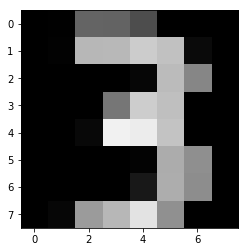

Picture is a 9!


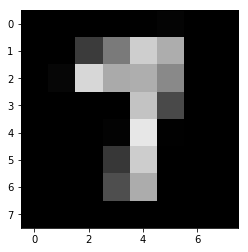

Picture is a 1!


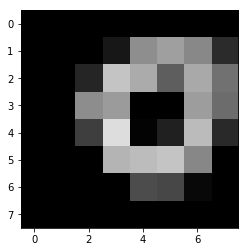

Picture is a 4!


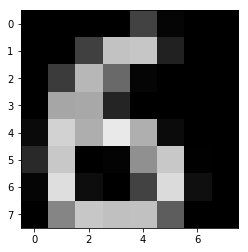

Picture is a 6!


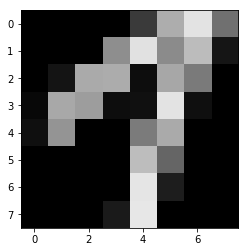

Picture is a 1!


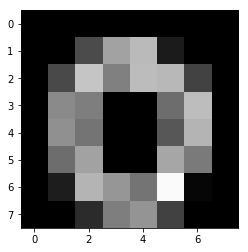

Picture is a 6!


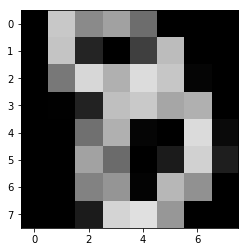

Picture is a 0!


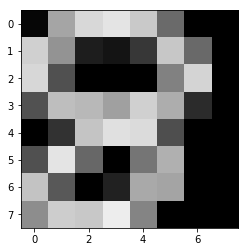

Picture is a 8!


In [2]:
from matplotlib.image import imread
import time

def predict_image(image, params):

    img = image[:, :, 0] * 10
    img = img.astype('float64')
    img = img.reshape(64, 1) / 255

    a_final, _ = forward_prop(img, params)
    res = from_array_to_onehot(a_final)
    
    plt.imshow(image)
    plt.show()

    print('Picture is a {}!'.format(np.argmax(res)))
    

for i in range(1, 9):
    image = imread('/Users/andrea/Desktop/prova{}.png'.format(i))
    predict_image(image, parameters)
    time.sleep(3)